## ENTRENAMIENTO MODELO

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
vino = pd.read_csv('../data/raw/winequality-white.csv', delimiter= ';')
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [20]:
vino_features = vino.drop(columns=['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates','quality'])
vino_features

,volatile acidity,chlorides,density,alcohol
0,0.27,0.045,1.00100,8.8
1,0.30,0.049,0.99400,9.5
2,0.28,0.050,0.99510,10.1
3,0.23,0.058,0.99560,9.9
4,0.23,0.058,0.99560,9.9
...,...,...,...,...
4893,0.21,0.039,0.99114,11.2
4894,0.32,0.047,0.99490,9.6
4895,0.24,0.041,0.99254,9.4
4896,0.29,0.022,0.98869,12.8


In [21]:
vino_target = vino['quality']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vino_features, vino_target, test_size=0.20, random_state=21)

In [34]:
print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))

(3918, 3918)
(980, 980)


Teniendo en cuenta que tenemos que predecir el nivel de la calidad del vino, se tratará de un ejercicio de clasificación.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **1. REGRESIÓN LOGÍSTICA**

In [63]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver='liblinear', random_state=21)
logisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=21, solver='liblinear')

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logisticRegression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   0   1   0   0   0]
 [  0   0  19   8   1   0]
 [  0   0 156 131   2   0]
 [  0   0  86 350  11   0]
 [  0   0   8 148  21   0]
 [  0   0   0  34   4   0]]


0.5377551020408163

In [56]:
import pickle

with open('modelo_LogReg.pkl', 'wb') as archivo:
    pickle.dump(logisticRegression, archivo)

El de la clase 7. Veamos otros modelos.

In [ ]:
# evaluación
# from sklearn.model_selection import cross_val_score

# cv_results = cross_val_score(logisticRegression, X_train, y_train, cv=10, scoring='accuracy')
# cv_results

### **2. ÁRBOL DE DECISIÓN**

In [57]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
decisionTree.score(X_test, y_test)

0.5938775510204082

Esta puntuación parece que ha mejorado algo la anterior.

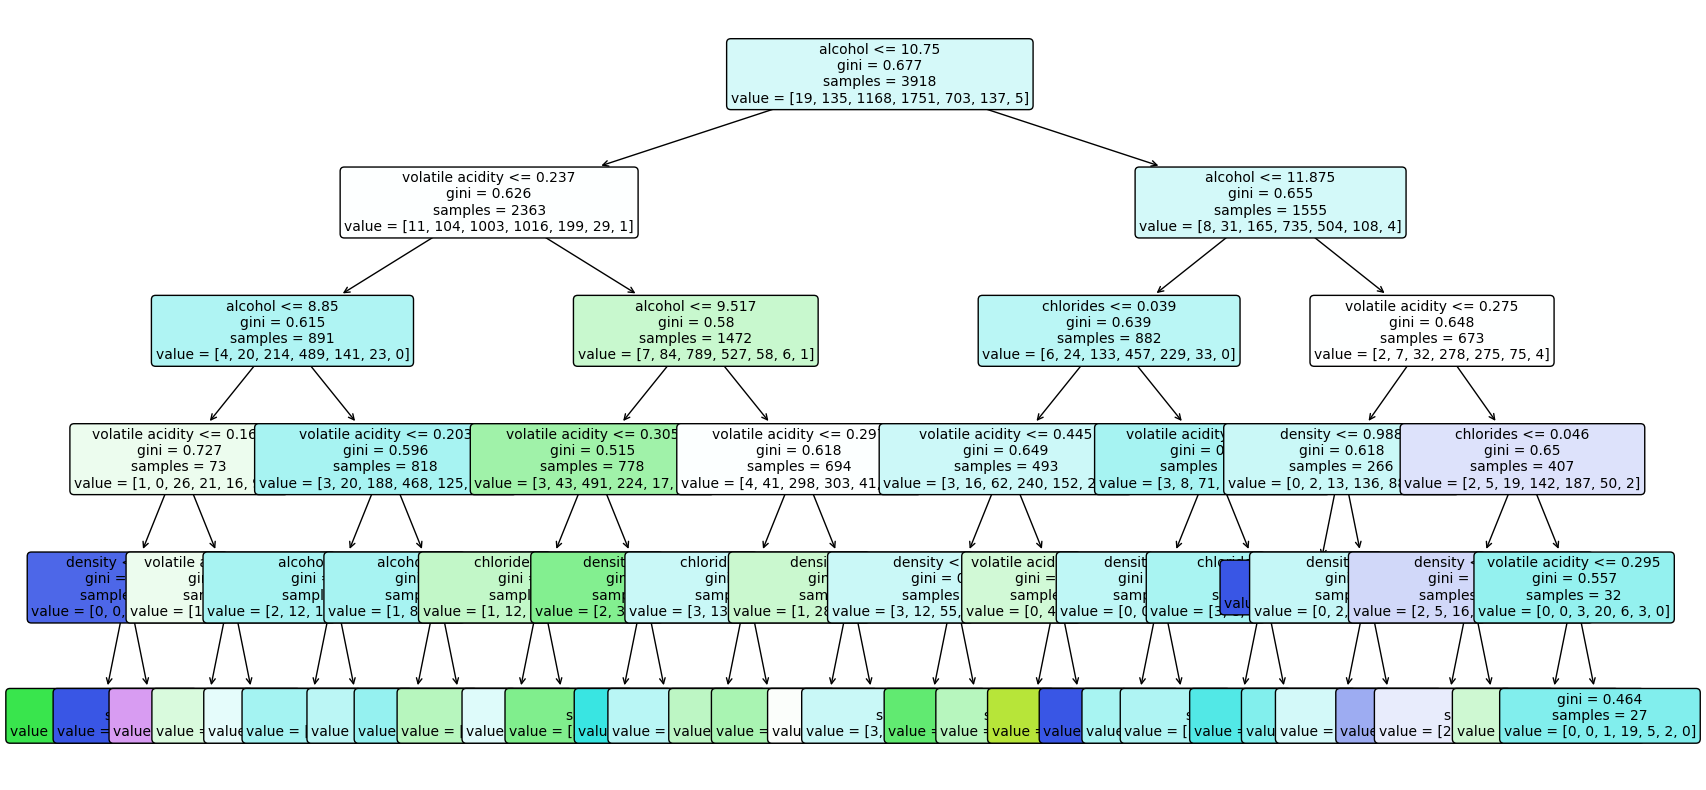

In [59]:
modelo_arbol = tree.DecisionTreeClassifier(max_depth=5)
modelo_arbol.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(modelo_arbol, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [60]:
with open('modelo_DecTree.pkl', 'wb') as archivo:
    pickle.dump(decisionTree, archivo)